In [1]:
# all of these libraries are used for plotting
import numpy as np
import matplotlib.pyplot as plt


# Define the grid on which we will evaluate our classifier
# it ranges from -2 to 3 in x, -5 to 3 in y
x_min, x_max = -1, 2.8
y_min, y_max = -4, 2.8
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

to_forward = np.array(list(zip(xx.ravel(), yy.ravel())))

# Plot the dataset
def plot_data(ax, X, Y):
    plt.axis('off')
    ax.scatter(X[:, 0], X[:, 1], s=1, c=Y, cmap='bone')
    plt.axis([x_min, x_max, y_min, y_max])

# plot the decision boundary of our classifier
def plot_decision_boundary(ax, X, Y, classifier):
    # forward pass on the grid, then convert to numpy for plotting
    Z = classifier.forward(to_forward)
    Z = Z.reshape(xx.shape)
    
    # plot contour lines of the values of our classifier on the grid
    ax.contourf(xx, yy, Z>0.5, cmap='Blues')
    
    # then plot the dataset
    plot_data(ax, X,Y)
        

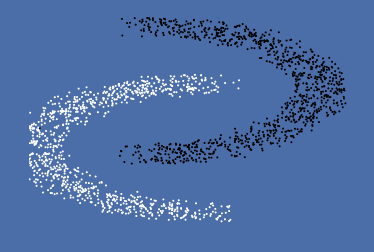

In [2]:
%matplotlib inline
# load the data and visualize it
data = np.load('./double_moon.npz')
X = data['X']
Y = data['Y']
fig, ax = plt.subplots(1, 1, facecolor='#4B6EA9')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plot_data(ax, X, Y)
plt.show()

In [ ]:
class Sequential(object):
    def __init__(self, layers):
        self.layers = layers
        
    def forward(self, x):
        # compute the forward by applying the forward pass sequentially
        return x
    
    def compute_loss(self, out, label):
        # use the BCE loss
        # -(label * log(output) + (1-label) * log(1-output))
        # save the gradient, and return the loss
        
        # beware of dividing by zero in the gradient.
        # split the computation in two cases, one where the label is 0 and another one where the label is 1
        # add a small value (1e-10) to the denominator

    def backward(self):
        # apply backprop sequentially, starting from the gradient of the loss
    
    def step(self, learning_rate):
        # take a gradient step for each layers

class MyLinear(object):
    def __init__(self, n_input, n_output):
        # initialize two random matrices for A and b

    def forward(self, x):
        # save a copy of x, you'll need it for the backward
        # return Ax + b

    def backward(self, grad_output):
        # y_i = \sum_j A_{i,j} x_j + b_i

        # d y_i / d A_{i, j} = x_j
        # d loss / d y_i = grad_output[i]
        # so d loss / d A_{i,j} = x_j * grad_output[i]  (by the chain rule)

        # d y_i / d b_i = 1
        # d loss / d y_i = grad_output[i]
        
        # now we need to compute the gradient with respect to x to continue the back propagation
        # d y_i / d x_j = A_{i, j}
        # to compute the gradient of the loss, we have to sum over all possible y_i in the chain rule
        # d loss / d x_j = \sum_i (d loss / d y_i) (d y_i / d x_j)
    
    def step(self, learning_rate):
        # update self.A and self.b in the opposite direction of the stored gradients, for learning_rate
    
    
class MyReLU(object):
    def forward(self, x):
        # the relu is y_i = max(0, x_i)
    
    def backward(self, grad_output):
        # the gradient is 1 for the inputs that were above 0, 0 elsewhere
    
    def step(self, learning_rate):
        # no need to do anything here, since ReLU has no parameters

class MySigmoid(object):
    def forward(self, x):
        # the sigmoid is y_i = 1./(1+exp(-x_i))
    
    def backward(self, grad_output):
        # the partial derivative is e^-x / (e^-x + 1)^2    (you can use wolframalpha for this)
    
    def step(self, learning_rate):
        # no need to do anything here since Sigmoid has no parameters

In [ ]:
%matplotlib notebook
h=50

# define your network with nn.sequential
# it could be a linear layer with 2 inputs and h outputs, followed by a ReLU
# then a linear layer with h inputs and 1 outputs, followed by a sigmoid
# feel free to try other architectures


fig, ax = plt.subplots(1, 1, facecolor='#4B6EA9')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
losses = []
for it in xrange(10000):
    # pick a random example id 

    # select the corresponding example and label

    # do a forward pass on the example

    # compute the loss according to your output and the label

    # backward pass

    # gradient step

    # draw the current decision boundary every 250 examples seen
    if it % 250 == 0 : 
        plot_decision_boundary(ax, X,Y, net)
        fig.canvas.draw()
plot_decision_boundary(ax, X,Y, net)
fig.canvas.draw()